# MBA FIAP Inteligência Artificial & Machine Learning

## Análise de Sentimento para *Reviews* de Filmes, em Português

**Diciplina**: Processamento de Linguagem Natural  
**Professor**: Rafael Novello

Este projeto tem como objetivo aplicar os conhecimentos adquiridos durante as aulas de *Natural Language Processing (NLP)*. 

**Objetivo**:  
Utilizando **todo** o dataset de revisões de filmes em português [1], criar um classificador de sentimentos que consiga um score na métrica *F1 Score* superior a 70%.

Fique a vontade para testar métodos de pré-processamento, abordagens, algoritmos e bibliotecas, mas explique e justifique suas decisões e **deixe claro** qual foi o melhor valor de F1 obtido.

O trabalho poderá ser feito em grupo (mesmos grupos do Startup One).

A data de entrega é dia 23/04/2019 até as 23:59 horas.

[1] - https://s3.amazonaws.com/aulas-fiap/imdb-reviews-pt-br.csv

**Integrantes**:

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Ariel Rodrigues             | RM 331163      | `2IA` |
| Duan Nunes             | RM 330648      | `2IA` |
| Jenifer Caroline             | RM 330720      | `2IA` |
| Juliana Fatima            | RM 330985      | `2IA` |


# Declarações

Nas próximas células estão os pacotes e funções criadas para utilização neste projeto. As descrições estão em Inglês para utilização da comunidade, caso necessário.

In [1]:
%%capture
! pip install matplotlib seaborn scikit-plot pandas nltk spacy scikit-learn unidecode keras tensorflow swifter
! python -m spacy download pt_core_news_sm

In [2]:
#################################
#         Visualization         #
#################################
# Graphic Libs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

#################################
#       Data Manipulation       #
#################################
# Data
import pandas as pd
import numpy as np
import itertools
from collections import Counter

# Remove Accents 
import unidecode
# Known Punctuation
from string import punctuation

# NLP
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

import spacy
nlp = spacy.load("pt_core_news_sm")
spacy_stopwords = spacy.lang.pt.stop_words.STOP_WORDS

# Brazillian Portuguese Stopwords
# Reference: fergiemcdowall Github
# https://github.com/fergiemcdowall/stopword/blob/master/lib/stopwords_br.js
ptbr_stopwords = [ 'a','à','adeus','agora','aí','ainda','além','algo','alguém','algum','alguma','algumas','alguns','ali','ampla',
          'amplas','amplo','amplos','ano','anos','ante','antes','ao','aos','apenas','apoio','após','aquela','aquelas',
          'aquele','aqueles','aqui','aquilo','área','as','às','assim','até','atrás','através','baixo','bastante','bem',
          'boa','boas','bom','bons','breve','cá','cada','catorze','cedo','cento','certamente','certeza','cima','cinco',
          'coisa','coisas','com','como','conselho','contra','contudo','custa','da','dá','dão','daquela','daquelas',
          'daquele','daqueles','dar','das','de','debaixo','dela','delas','dele','deles','demais','dentro','depois',
          'desde','dessa','dessas','desse','desses','desta','destas','deste','destes','deve','devem','devendo','dever',
          'deverá','deverão','deveria','deveriam','devia','deviam','dez','dezanove','dezasseis','dezassete','dezoito',
          'dia','diante','disse','disso','disto','dito','diz','dizem','dizer','do','dois','dos','doze','duas','dúvida',
          'e','é','ela','elas','ele','eles','em','embora','enquanto','entre','era','eram','éramos','és','essa','essas',
          'esse','esses','esta','está','estamos','estão','estar','estas','estás','estava','estavam','estávamos','este',
          'esteja','estejam','estejamos','estes','esteve','estive','estivemos','estiver','estivera','estiveram',
          'estivéramos','estiverem','estivermos','estivesse','estivessem','estivéssemos','estiveste','estivestes',
          'estou','etc','eu','exemplo','faço','falta','favor','faz','fazeis','fazem','fazemos','fazendo','fazer',
          'fazes','feita','feitas','feito','feitos','fez','fim','final','foi','fomos','for','fora','foram','fôramos',
          'forem','forma','formos','fosse','fossem','fôssemos','foste','fostes','fui','geral','grande','grandes',
          'grupo','há','haja','hajam','hajamos','hão','havemos','havia','hei','hoje','hora','horas','houve','houvemos',
          'houver','houvera','houverá','houveram','houvéramos','houverão','houverei','houverem','houveremos','houveria',
          'houveriam','houveríamos','houvermos','houvesse','houvessem','houvéssemos','isso','isto','já','la','lá',
          'lado','lhe','lhes','lo','local','logo','longe','lugar','maior','maioria','mais','mal','mas','máximo','me',
          'meio','menor','menos','mês','meses','mesma','mesmas','mesmo','mesmos','meu','meus','mil','minha','minhas',
          'momento','muita','muitas','muito','muitos','na','nada','não','naquela','naquelas','naquele','naqueles','nas',
          'nem','nenhum','nenhuma','nessa','nessas','nesse','nesses','nesta','nestas','neste','nestes','ninguém',
          'nível','no','noite','nome','nos','nós','nossa','nossas','nosso','nossos','nova','novas','nove','novo',
          'novos','num','numa','número','nunca','o','obra','obrigada','obrigado','oitava','oitavo','oito','onde',
          'ontem','onze','os','ou','outra','outras','outro','outros','para','parece','parte','partir','paucas','pela',
          'pelas','pelo','pelos','pequena','pequenas','pequeno','pequenos','per','perante','perto','pode','pude','pôde',
          'podem','podendo','poder','poderia','poderiam','podia','podiam','põe','põem','pois','ponto','pontos','por',
          'porém','porque','porquê','posição','possível','possivelmente','posso','pouca','poucas','pouco','poucos',
          'primeira','primeiras','primeiro','primeiros','própria','próprias','próprio','próprios','próxima','próximas',
          'próximo','próximos','pude','puderam','quais','quáis','qual','quando','quanto','quantos','quarta','quarto',
          'quatro','que','quê','quem','quer','quereis','querem','queremas','queres','quero','questão','quinta','quinto',
          'quinze','relação','sabe','sabem','são','se','segunda','segundo','sei','seis','seja','sejam','sejamos','sem',
          'sempre','sendo','ser','será','serão','serei','seremos','seria','seriam','seríamos','sete','sétima','sétimo',
          'seu','seus','sexta','sexto','si','sido','sim','sistema','só','sob','sobre','sois','somos','sou','sua','suas',
          'tal','talvez','também','tampouco','tanta','tantas','tanto','tão','tarde','te','tem','tém','têm','temos',
          'tendes','tendo','tenha','tenham','tenhamos','tenho','tens','ter','terá','terão','terceira','terceiro',
          'terei','teremos','teria','teriam','teríamos','teu','teus','teve','ti','tido','tinha','tinham','tínhamos',
          'tive','tivemos','tiver','tivera','tiveram','tivéramos','tiverem','tivermos','tivesse','tivessem',
          'tivéssemos','tiveste','tivestes','toda','todas','todavia','todo','todos','trabalho','três','treze','tu',
          'tua','tuas','tudo','última','últimas','último','últimos','um','uma','umas','uns','vai','vais','vão','vários',
          'vem','vêm','vendo','vens','ver','vez','vezes','viagem','vindo','vinte','vir','você','vocês','vos','vós',
          'vossa','vossas','vosso','vossos','zero','1','2','3','4','5','6','7','8','9','0','_' ]

##################################
#           Environment          #
##################################
# Verify UTF-8
import sys
assert(sys.getdefaultencoding()=='utf-8')

# Remove iPython columns and rows limits 
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# OS Lib
import os
import warnings
warnings.filterwarnings('ignore')

# Date
import datetime
import time

# Pandas Multitask
import swifter

#################################
#        Machine Learning       #
#################################
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Math Models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Final Estimator 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Metrics and Cross Validation 
from sklearn.metrics import confusion_matrix, classification_report, f1_score, make_scorer
from sklearn.model_selection import StratifiedShuffleSplit,learning_curve

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Micro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Micro\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [3]:
# Confusion Matrix (Adaptations was done)
# Reference: Scikit-Learn Documentation
# Link: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# Descrption: Plot graphical Confusion Matrix
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
# Learning Curve (With some changes)
# Reference: Scikit-Learn Documentation
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
# Description: Plot learning curve performance of a model, considering Stratified folds
def plot_learning_curve(estimator, 
                        title, 
                        X, 
                        y, 
                        ylim=None, 
                        cv=None,
                        n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    # Change
    fig=plt.figure()
    
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
                                                            estimator, X, y, cv=cv, scoring=scorer,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    # Modification
    # Show scores in the dots
    ax = fig.add_subplot(111)
    x = train_sizes
    y = [round(score, 3) for score in test_scores_mean]
    
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j), color="g")
    
    y = [round(score, 3) for score in train_scores_mean]
    
    for i,j in zip(x,y):
        ax.annotate(str(j),xy=(i,j), color="r")
        
    # Continue

    plt.legend(loc="best")
    
    return plt

In [5]:
# Scoring Function
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# Description: Function created to translate categorical labels to numerical 
# to calculate True Positives, and the others, during the Classification tests (Confusion Matrix)

def f1_scoring(y_true, y_pred):
    return f1_score(y_true,y_pred, average="weighted")

In [6]:
# Text Preprocess
# Description: Do some preprocess in the text for EDA and enhance models performance
def text_preprocess(text):
  
    # Lower cases and remove accents
    text_processed = unidecode.unidecode(text).lower()
  
    # Remove punctiations
    for special_char in punctuation:
        text_processed = text_processed.replace(special_char, "")
    
    # Keep only words
    text_processed = ''.join(valid for valid in text_processed if not valid.isdigit())
    
    # Stemmer
    text_processed = ' '.join(stemmer.stem(word) for word in text_processed.split(' ') if word)
    
    # Words in original form
    # Tested: More Expensive, without some metrics enhancements
    # phrase = nlp(text_processed)
    # text_processed = ' '.join(lemmatizer.lemma_ for lemmatizer in phrase)
        
    return text_processed

# EDA - Exploratory Data Analysis

Neste momento o *dataset* é carregado em memória para iniciar a análise. Os textos são pré-processados e alguns gráficos são gerados para um melhor entendimento dos dados.

In [7]:
# Cloud usage
#df = pd.read_csv('https://s3.amazonaws.com/aulas-fiap/imdb-reviews-pt-br.csv', encoding='utf-8')

# Local environment
df = pd.read_csv('imdb-reviews-pt-br.csv', encoding='utf-8')

In [8]:
# Removing unnecessary columns and fixing indexes
df.drop(columns='id', index=1, inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,text_en,text_pt,sentiment
0,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
2,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
3,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
4,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg


O *dataset* possui 3 colunas iniciais:

| text_en     | text_pt            | sentiment |
| :----------------------- | :------------- | :-----: |
| Texto do Review em Inglês             | Texto do Review em Português      | Sentimento do Review (Positivo ou Negativo) |

**Dúvidas** 

O *dataset* é balanceado?

In [9]:
# Is your dataset balanced?
df['sentiment'].value_counts()

neg    24764
pos    24694
Name: sentiment, dtype: int64

Apesar de não ser perfeitamente balanceado, o volume de dados por sentimento é o suficiente para continuar com a análise.

Algum campo possui informações nulas?

In [10]:
# There is some null data inside the dataset?
df.isnull().sum()

text_en      0
text_pt      0
sentiment    0
dtype: int64

O *dataset* não possui dados nulos, o que é um ótimo fator para reduzir um pré-processamento dos textos nas próximas etapas.

In [11]:
# Creating a copy of the dataset, just in case :)
df_original = df.copy()

Neste momento iniciamos o pré-processamento dos textos.

1 - Será aplicado um processamento nos textos através da função **text_preprocess**, responsável pela tokenização e correção das palavras através de técnicas de *NLP*, como o *Stemmer*;  
2 - Obter o tamanho de cada *review*, em caracteres;  
3 - Calcular a quantidade de palavras por *Review*;  
4 - Remapeamento da coluna *sentiment*, de texto abreviado para texto completo.  

Em seguida o mesmo processamento é aplicado na variável *ptbr_stopwords*.

In [12]:
# New labels mapping
labels = {'pos': 'positive',
          'neg': 'negative'}

# Reprocess purposes 
# df = df_original.copy()

# Text processing: Processing Portuguese text
# New field with text_preprocess returned data
df['text_processed'] = df['text_pt'].swifter.progress_bar(enable=True).apply(text_preprocess)

# Lenght of each text
df['text_len'] = df['text_pt'].map(len)

# Counting how many words we have
df['word_count'] = df['text_pt'].swifter.apply(lambda words: len(str(words).split()))

# Mapping labels
df['sentiment'] = df['sentiment'].map(labels)

# Preprocessing PTBR stopwords
ptbr_processed = []
for x in ptbr_stopwords:
    ptbr_processed.append(text_preprocess(x))

ptbr_stopwords = list(set(ptbr_processed))
ptbr_stopwords.sort()

# Save results on disk, due to time for processing
df.to_csv('dados_processados.csv')

Visão pós-processamento dos dados.

In [13]:
# Read already processed data, avoid to process the text everytime
#df = pd.read_csv('dados_processados.csv', encoding='utf-8')

# Verifying our data after processing
df.head(5)

,text_en,text_pt,sentiment,text_processed,text_len,word_count
0,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",negative,mais uma vez o sr costn arrum um film por muit...,978,168
1,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",negative,prim de tud eu odei ess rap imbecil que nao po...,1185,213
2,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,negative,nem mesm os beatl pud escrev music que tod gos...,1848,324
3,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,negative,film de fot de lata nao e uma palavr apropri p...,1531,244
4,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,negative,uma cois engrac acontec comig enquant assist m...,663,116


**Dúvidas**

Qual a distribuição da quantidade de palavras?

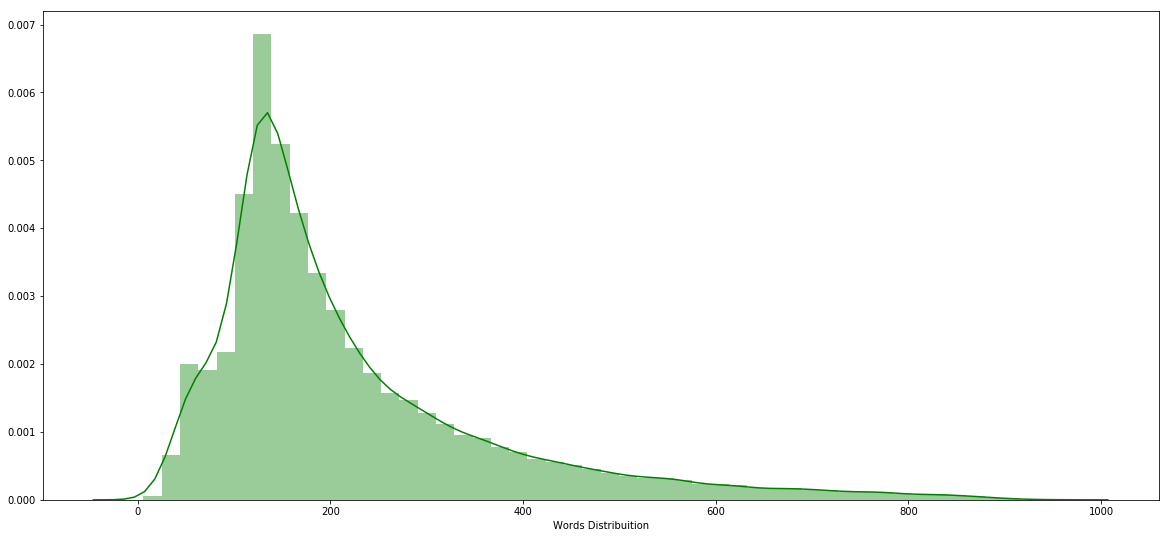

In [14]:
# How many words we have in our reviews?
plt.figure(figsize=(20, 9))
sns.distplot(df['word_count'], color='green', axlabel ='Words Distribuition')

# We have a lot of reviews between 150-200 words.

O gráfico nos mostra que a maioria dos *reviews* possuem entre 150-200 palavras, além de exibir alguns *reviews* com mais de 1000 palavras.

**Hipótese**: Será que com a média de palavras é possível discriminar cada sentimento?

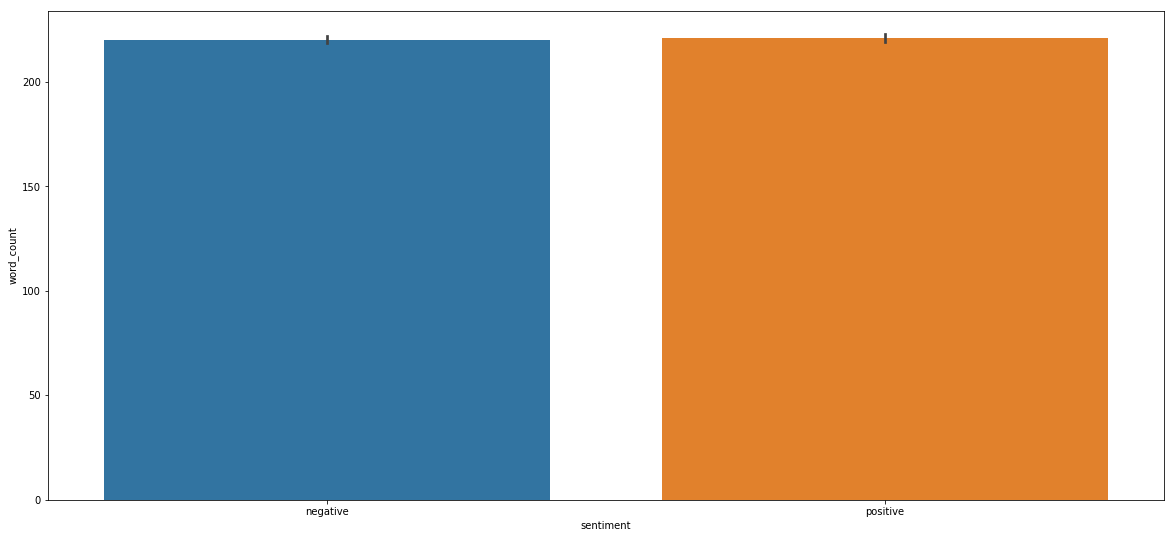

In [15]:
# Word count by label
plt.figure(figsize=(20, 9))
sns.barplot(x='sentiment', y='word_count', data=df, )

# Considering average, each label has the same number of words.

**Validação de Hipótese**: Rejeitada.   

Apesar de valores diferentes, a média de quantidade de palavras por sentimento é bem próxima, o que significa que a quantidade de palavras não é o suficiente para discriminar os sentimentos.

**Extra**: Quais as palavras mais utilizadas no *dataset*?

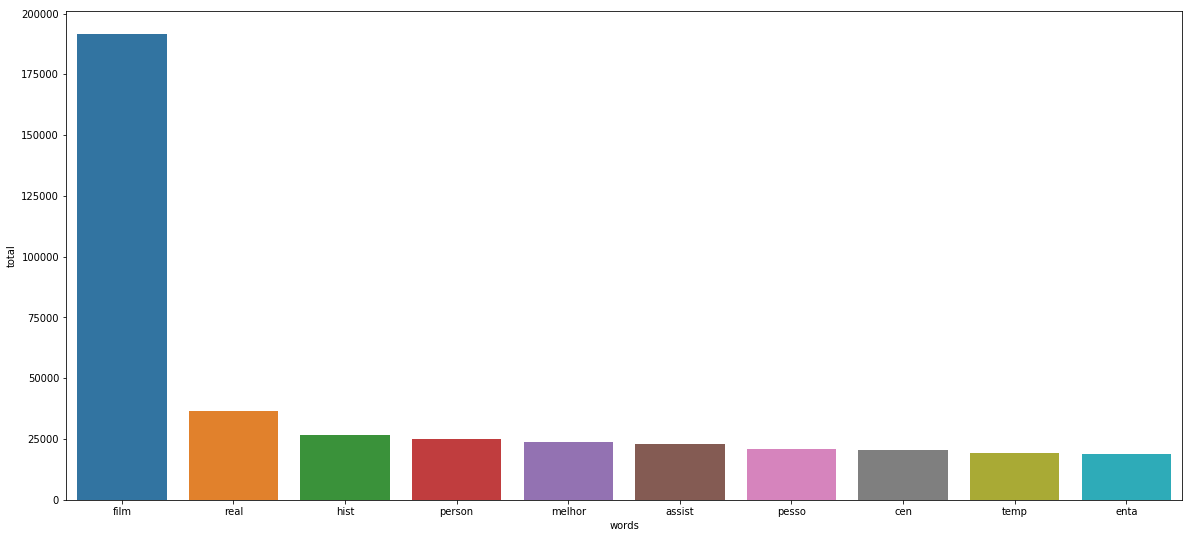

In [16]:
# Most commom words in the dataset

# NLTK Portugal + Punctuation + Spacy Stopwords + Web PRBR Stop Worlds
stop_words = set(stopwords.words('portuguese') + list(spacy_stopwords)+ ptbr_stopwords)

# Counter class object
words = Counter()

# Tokenization and count by word
df.text_processed.str.split(" ").apply(words.update)

# Removing words without relevance for the Plot
# Only for Lemmatization
#words.pop('d')
#words.pop('n')

# Remove Stopwords + Punctuation
for remove_word in stop_words:
    words.pop(remove_word) if words.get(remove_word) else None

# New DF for visualization
df_words = pd.DataFrame(words.most_common(10), columns=['words', 'total'])

# Plot
plt.figure(figsize=(20, 9))
sns.barplot(x="words", y="total", data=df_words)

# palavras.most_common(10)

Através do gráfico é possível identificar as palavras mais utilizadas no *dataset*. Com esses dados é possível inferir que a base se trata de **filmes**, devido a alta ocorrência de radicais de palavras como **filme**, **personagem** e **assistir**. Este nível de informação não agrega ao atual projeto, pois já é sabido sobre o que se trata a base, mas, mostra que utilizando  técnicas de *NLP* é possível inferir o conteúdo sem conhece-lo previamente.

# Machine Learning

Através de técnicas de *Machine Learning* será possível classificar os textos do *dataset*. É Necessário identificar quais modelos estatísticos mais se encaixam ao atual problema, e uma vez identificado, deve-se otimiza-lo de acordo com o poder computacional disponível.

Para processamento de texto é necessário tomar duas decisões:  
1 - Conversão de Texto para Vetores;  
2 - Modelo de Aprendizado de Máquina.

Ambos serão tratados nos próximos passos.

Durante todo este processo será considerado a métrica *F1 Score* para medir a performance dos modelos. *F1 Score* representa a média ponderada entre *Precision* e *Recall*, que são outras duas métricas utilizadas para problemas de classificação.

Informações sobre o computador utilizado:

CPU: Core i7-8550U @ 1.8ghz  
Memoria: 16gb DDR4

## Escolha do modelo

Qual modelo melhor se comporta ao *dataset* de *review* de filmes?

A Base será quebrada em duas:  
1 - Treino (70%): Será a base utilizada para identificar o melhor algoritmo para o problema, em conjunto com a técnica de *Cross-Validation*;  
2 - Validação (30%): Uma parte menor da base que não será vista pela a análise e será utilizada somente para validação após o treinamento do modelo.

É importante ressaltar que os dados não estão perfeitamente balanceados, e por essa razão a análise irá considerar estratificação proporcional estatística. Este método consiste em manter as proporções dos dados exatamente iguais nas bases de treinamento e de teste.

In [32]:
# Stratified datasets
# One split just to separate data in 2 parts: Train and Test (Validation for this case)
train_cv = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=42)

for train_index, valid_index in train_cv.split(df["text_processed"], df["sentiment"]):
    train = train_index
    valid = valid_index

X_train = df.loc[train, "text_processed"]
X_valid = df.loc[valid, "text_processed"]

y_train = df.loc[train, "sentiment"]
y_valid = df.loc[valid, "sentiment"]

Validando valores estratificados para Treino.

In [18]:
# Validate train stratified
pd.Series(y_train).value_counts()

negative    17334
positive    17286
Name: sentiment, dtype: int64

Validando valores estratificados para Teste.

In [33]:
# Validate test stratified
pd.Series(y_valid).value_counts()

negative    7430
positive    7408
Name: sentiment, dtype: int64

## Vetorização Textual - *Bag of Words*

Atualmente é possível o processamento de textos de forma digital, porém, é necessário a conversão destes textos para um formato que possa ser processada pelo computador.

Durante a avaliação dos modelos serão utilizadas duas técnicas voltada para *NLP*: [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) e [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

Essas técnicas são responsáveis por 'traduzir' os textos para vetores, que podem ser processados pelo computador.

Cada modelo de aprendizado estatístico será testado duas vezes: Uma com CountVectorizer e outra com TF-IDF.

Neste projeto existem dois passos necessário para a classificação dos textos. Cada passo gera um modelo de *Machine Learning* independente. Um modelo é responsável pela transformação de texto em vetor, que deve ser executado primeiro, e outro que deve consumir o vetor e realizar a classificação do texto, ou seja, temos uma dependência entre os processos.  

Será necessária a criação de um *'Pipeline'* de *Machine Learning*, que deve processar o texto e entregar o resultado ao final.  
Neste projeto o utilizaremos o método *Pipeline*, da biblíoteca *Scikit-Learn*, que receberá o texto puro, e o objeto fica responsável por converter o texto para vetor e em seguida realizar a classificação, tudo em um único binário e em única linha de código. Está técnica é útil principalmente para simplificação de deploy dos modelos em produção, enviando somente um arquivo binário e reduzindo a quantidade de linhas de código.

Para maiores detalhes, acesse a documentação oficial sobre o [*Pipeline*](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

Abaixo listamos os classificadores escolhidos para teste no projeto, com a utilização do *Pipeline*.

In [20]:
# Models to validate

# Classification models with CountVectorizer and StopWords
mult_nb = Pipeline([("count_vectorizer", CountVectorizer()), ("multinomial nb", MultinomialNB())])
bern_nb = Pipeline([("count_vectorizer", CountVectorizer()), ("bernoulli nb", BernoulliNB())])
svc = Pipeline([("count_vectorizer", CountVectorizer()), ("linear svc", SVC(kernel="linear", random_state=42))])
svc_rbf = Pipeline([("count_vectorizer", CountVectorizer()), ("linear svc", SVC(kernel="rbf", random_state=42))])
rndm_forest = Pipeline([("count_vectorizer", CountVectorizer()), ("random forest", RandomForestClassifier(random_state=42))])
log_regression = Pipeline([("count_vectorizer", CountVectorizer()), ("logistic regression", LogisticRegression(random_state=42))])

# Classification models with TF-IDF
mult_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer()), ("multinomial nb", MultinomialNB())])
bern_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer()), ("bernoulli nb", BernoulliNB())])
svc_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer()), ("linear svc", SVC(kernel="linear", random_state=42))])
svc_rbf_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer()), ("linear svc", SVC(kernel="rbf", random_state=42))])
rndm_forest_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer()), ("random forest", RandomForestClassifier(random_state=42))])
log_regression_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer()), ("logistic regression", LogisticRegression(random_state=42))])

In [21]:
# List of models to be processed in learning curve function
all_models = [
      ("Multinomial NaiveBayes", mult_nb),
      ("Multinomial NaiveBayes with TF-IDF weighting", mult_nb_tfidf),
      ("Bernoulli NaiveBayes", bern_nb),
      ("Bernoulli NaiveBayes with TF-IDF weighting", bern_nb_tfidf),
      ("Random Forests", rndm_forest),
      ("Random Forests with TF-IDF weighting", rndm_forest_tfidf),
      ("Logistic Regression", log_regression),
      ("Logistic Regression with TF-IDF weighting", log_regression_tfidf)
]

# Tested: We are not using SVM models, because they are computacional expensive
svm_models = [ 
      ("Linear SVC", svc),
      ("Linear SVC with TF-IDF weighting", svc_tfidf),
      ("SVC with RBF kernel", svc_rbf),
      ("SVC with RBF kernel and TF-IDF weighting", svc_rbf_tfidf)
]

Para identificação do modelo ideal para a classificação será utilizado a função *plot_learning_curve*, obtida na documentação do *Scikit-Learn*, processando a base de **treino**.

A Base de **treino** será utilizada em conjunto com a técnica de *Cross-Validation*, que quebra a base em N sub-partes aleatórias (também conhecidos como *Folds*) de treino e teste, ou seja, cria vários conjuntos aleatórios dos mesmos dados, onde em um *Fold* o dado X pode ser treino, mas em outro *Fold* o dado X pode ser teste. Essa técnica permite, por exemplo, identificar variância nos dados, caso a curva apresente alto desvio padrão nas curvas, e avaliar a performance de cada modelo no conjunto de dados.

Ao final de cada execução é apresentado um gráfico com a curva de aprendizado de cada modelo e, o que tiver a melhor curva de teste, será escolhido. Caso a curva de treino mantenha-se fixa, o modelo apresenta *overfitting* e não poderá ser escolhido para otimização, então é necessário avaliar ambas as curvas, não somente a de teste.

Lembrando que a validação da *learning curve* será feita através da métrica *F1 Score*.

Started at 2019-04-21 10:00:53.017744.


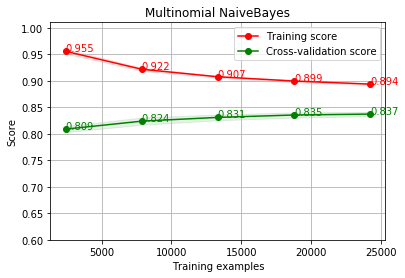

Elapsed 0:01:33.709414.


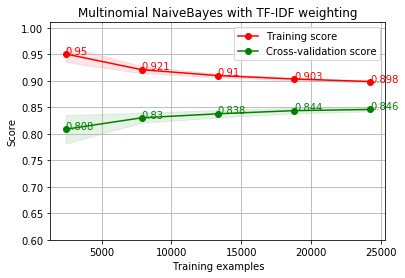

Elapsed 0:03:12.047328.


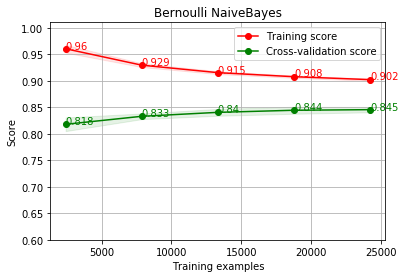

Elapsed 0:04:49.603454.


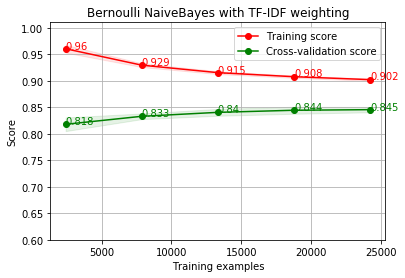

Elapsed 0:06:28.289421.


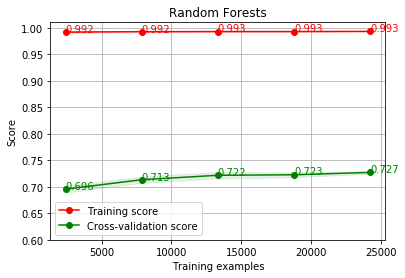

Elapsed 0:08:42.430377.


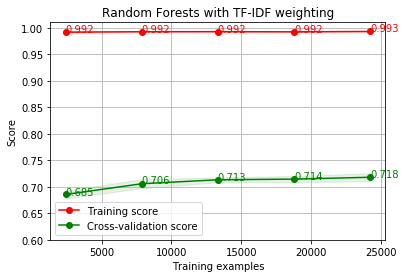

Elapsed 0:10:55.875608.


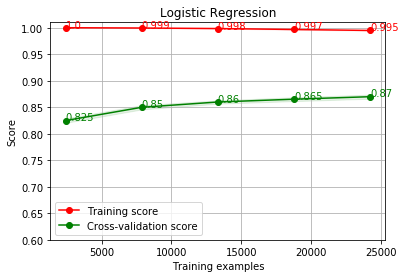

Elapsed 0:13:41.634087.


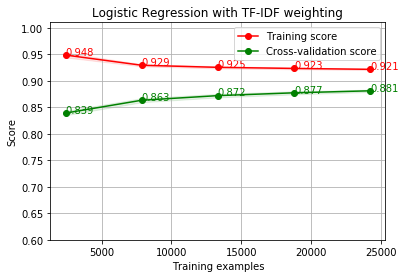

Elapsed 0:15:28.737535.


In [22]:
# Train and Test stratification
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.30, random_state=42)

# Higher F1 Score, used inside the learning curve function
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
scorer = make_scorer(f1_scoring, greater_is_better=True, needs_proba=False, needs_threshold=False)

# Start
start = datetime.datetime.now()

print('Started at {0}.'.format(start))

# for each model
for title, model in all_models:
    
    # Plot
    plot_learning_curve(estimator=model,  # Model
                        title=title,      # Model Name
                        X=X_train,        # Dataset features
                        y=y_train,        # Dataset labels
                        ylim=(0.6, 1.01), # Plot y scale
                        cv=cv,            # Cross Validation 
                        n_jobs=-1)        # -1 = Using all CPUs
    plt.show()
    
    now = datetime.datetime.now()
    print('Elapsed {0}.'.format(now-start))

Observando como exemplo o gráfico do modelo *Multinomial NaiveBayes with TF-IDF weighting*, existe um leve sombreamento abaixo da linha **teste** (verde). Esse sombreamento significa o desvio padrão durante a execução daquele *Fold*. Caso esse sombreamento seja muito grande os dados possuem variância alta, o que pode significar um outlier ou que o modelo não é o ideal para os dados em questão.

Os ponto nas linhas representam a média de acerto para cada *Fold* processada, e a medida que mais dados são inseridos nos *Folds* o aprendizado pode, ou não, ser maior. Por esse motivo procuramos por uma curva em ascensão.

## Otimização de Parâmetros

De acordo com os gráficos acima, a Regressão Logística foi a que apresentou uma melhor performance, em conjunto com a técnica de TF-IDF. A curva de teste teve o melhor desempenho, apesar da curva de treino reduzir com o tempo.

O modelo de regressão logística cálcula a probabilidade de um evento acontecer (1), ou não (-1), baseado na função de ativação conhecida como *sigmoid*. Para a nossa classificação de textos, que é binária (Positivo e Negativo), este modelo se encaixa bem e pode ter uma performance melhor se bem otimizado.

Através da técnica de [*GridSearch*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) será avaliado os melhores parametros para o atual conjunto de dados.

In [23]:
# Start
start = datetime.datetime.now()
print('Started at {0}.'.format(start))

# Pipeline
model = Pipeline([("tfidf_vectorizer", TfidfVectorizer()), ("logistic_regression", LogisticRegression())])

# Paremeter reference:
# TF-IDF: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# L1 vs L2 https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

# Parameters for the choosen model
parameters = {
                "tfidf_vectorizer__lowercase": [True],               # Lowercase
                "tfidf_vectorizer__min_df": [0.1, 0.2, 200],         # Words with minimum frequency
                "tfidf_vectorizer__max_df": [0.7, 0.85, 0.90],       # Words that appears more than X% of the total documents (Remove specific corpus 'stopwords')
                "tfidf_vectorizer__ngram_range": [(1,2),(1,3)],      # Combination of words (instead of each one separately)
                "tfidf_vectorizer__stop_words": [stop_words, None],  # Language stopwords
                "logistic_regression__random_state": [42],           # Same random_state to guarantee the same model results
                "logistic_regression__penalty": ['l2'],              # Linear Regression penalty, in this case, Ridge
                "logistic_regression__C": [0.5, 1, 2],               # Regularization level
                "logistic_regression__class_weight": [None],         # For balanced datasets only, in this case we do not have one
                "logistic_regression__n_jobs": [-1]                  # Using all CPUs available
    }

# GRID Execution
best_model = GridSearchCV(model,          # Model
                          parameters,     # Parameters
                          scoring=scorer, # Best Score Metric
                          n_jobs=-1,      # -1 = Using All CPU
                          cv=cv,          # Cross-Validation
                          verbose=2)      # Grid information     

best_model.fit(X_train, y_train)

# Identifying the best estimator for our execution
print('Best GRID estimator: {0}'.format(best_model.best_estimator_))

now = datetime.datetime.now()

print('\nElapsed {0}.'.format(now-start))

Started at 2019-04-21 10:16:21.767247.
Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 89.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 147.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 160.2min finished


Best GRID estimator: Pipeline(memory=None,
     steps=[('tfidf_vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.85, max_features=None, min_df=200,
        ngram_range=(1, 3), norm='l2', preprocessor=None, sm...  penalty='l2', random_state=42, solver='warn', tol=0.0001,
          verbose=0, warm_start=False))])

Elapsed 2:40:59.451084.


Abaixo, usando a base de **treino** como dados de entrada do modelo, será avaliado a *learnin curve* da Regresão Logística com os melhores parâmetros encontrados através do *GridSearch*.

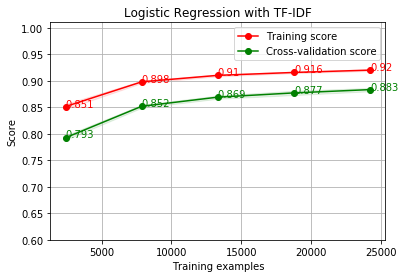

In [24]:
# Build the final model
final_model = best_model.best_estimator_
title = "Logistic Regression with TF-IDF"

# final learning curve
# Plot
plot_learning_curve(estimator=final_model,  # Model
                    title=title,            # Model Name
                    X=X_train,              # Dataset features
                    y=y_train,              # Dataset labels
                    ylim=(0.6, 1.01),       # Plot y scale         
                    cv=cv,                  # Cross Validation 
                    n_jobs=-1)              # -1 = Using all CPUs
plt.show()

A métrica final de *F1 Score* é 88.3% utilizando *Cross-Validation* com 10 *Folds*, considerando somente a base de treino pós otimização dos parametros para nossos dados. É possível identificar que não há variância entre os dados e que ambas as curvas estão em ascensão.

O melhor *parameter set* foi identificado para o atual conjunto dados, agora é o momento de treinar o modelo.

Em uma aplicação de mundo real de *Machine Learning* a separação de **treino** e **teste** é feita somente durante o processo de *Cross-Validation*, e ao final da avaliação das *learning curves* **todo** o conjunto de dados é utilizado para treinar o modelo, uma vez que a quantidade de dados influência diretamente na qualidade final do aprendizado e na generalização, evitando assim o *overfitting*. 

Como este projeto tem fins acadêmicos e dados limitados, o conjunto de **treino** será utilizado para treinamento do modelo, e o conjunto de **validação** utilizado como 'dados reais' de produção, para fins de validação do modelo. 

In [25]:
# Training the model with Train data
final_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf_vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.85, max_features=None, min_df=200,
        ngram_range=(1, 3), norm='l2', preprocessor=None, sm...  penalty='l2', random_state=42, solver='warn', tol=0.0001,
          verbose=0, warm_start=False))])

# Validação

Modelo escolhido, otimizado e treinado, esse é o momento de validação.

O *dataset* de **validação** será utilizado para analisar a performance 'real' do modelo. Os dados serão passados pelo modelo, que será avaliado através de métricas e gráficos.

Confusion matrix, without normalization


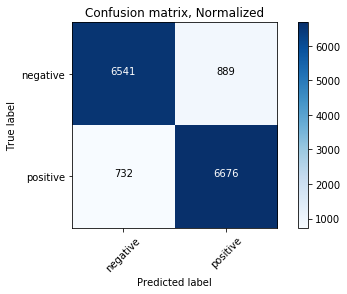

In [34]:
# Prediction the validation results

# Labels prediction
y_pred = final_model.predict(X_valid)

# Probability prediction
y_pred_proba = final_model.predict_proba(X_valid)

# Confusion Matrix
cnf_matrix = confusion_matrix(y_valid, y_pred)
np.set_printoptions(precision=2)

# Confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, 
                      classes=final_model.classes_,
                      title='Confusion matrix, Normalized', 
                      normalize=False)
plt.show()

O Gráfico acima é conhecido como Matriz de Confusão, e é amplamente usando para problemas de classificação. Essa matriz nos informa a quantidade de acertos e erro entres as classes, além dos valores para as métricas de *True Positive*, *True Negative*, *False Positive* e *False Negative*.

A tabela abaixo mostra as métricas de *Precision*, *Recall* e *F1* Score separadamente.

In [35]:
# Classification metrics
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7430
    positive       0.88      0.90      0.89      7408

   micro avg       0.89      0.89      0.89     14838
   macro avg       0.89      0.89      0.89     14838
weighted avg       0.89      0.89      0.89     14838



A tabela acima nos informa que o *F1 Score* é de 89% para a base de **validação**! É um ótimo resultado para a classificação proposta pelo projeto.

Abaixo temos a curva ROC, que representa uma relação entre os *True Positives (TP)* e *False Positives (FP)*, por classe. Isso nos informa a performance na relação erro vs acerto do modelo, considerando a medida que os *TP* aumentam em relação aos *FP*.

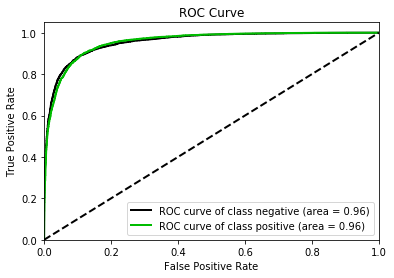

In [36]:
# ROC curve
skplt.metrics.plot_roc(y_valid, y_pred_proba, plot_macro=False, plot_micro=False, title='ROC Curve')
plt.show()

Por último, a relação entre *Precision* e *Recall*. Este gráfico nos informa o ganho global do nosso modelo, por classe, de quanto ele acerta (*Precision*) e o quanto ele recupera (*Recall*) dos dados usados para **validação**.

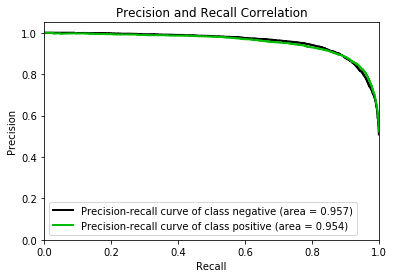

In [37]:
# Precision and Recall correlation
skplt.metrics.plot_precision_recall(y_valid, y_pred_proba, plot_micro=False, title='Precision and Recall Correlation')
plt.show()

O modelo possui uma *Precision* bem alta em relação ao *Recall*, o que pode ser de fato validado através da Matriz de Confusão. O Recall cai apartir do momento que o modelo começa a errar.

Com o modelo pronto podemos exporta-lo para produção!

In [30]:
# Extra - Export you model
from sklearn.externals import joblib

joblib.dump(final_model, "movie_review_classifier.bin")

['movie_review_classifier.bin']

# Aplicação do modelo com dados reais

Que tal fazer um teste de predição com um texto fora do dataset?

Através do site [IMDB.com](https://www.imdb.com/), buscamos por dois *reviews* do filme *Avengers: Infinite War* (Vingadores: Guerra Infinita), um com 10 (dez) estrelas, que se aplica como *positive*, e um com 1 (uma) estrelha, que seria o *negative*. Os *reviews* foram traduzidos de forma livre do inglês para o português Brasil para adaptação do modelo.

Abaixo esses *reviews* serão passados pelo modelos, como uma forma de prova de conceito.  

Será que o modelo está performando bem com dados jamais vistos?

Considerando uma aplicação pronta para produção, o modelo anteriormente exportado da memória será carregado para uma nova variável, e através dela realizar as classificações.

In [31]:
# Predicting a review from the internet.
# Subject: Avengers: Infinite War
# Reference: https://www.imdb.com/review/rw4284818/?ref_=tt_urv, https://www.imdb.com/review/rw4775345/?ref_=tt_urv
# Pos / Neg respective
# Free translation to portuguese

# Loading the model already created from the disk
classifier = joblib.load("movie_review_classifier.bin") 

# Original text
review_pos = 'Este filme é o começo da culminação do magistral universo cinematográfico tecido pela Marvel. Começando em 2008 com o Homem de Ferro, finalmente estamos vendo os resultados de todos os filmes apontam; e não decepcionou. Thanos é um vilão complexo, com desejos mais profundos e interessantes do que apenas a "dominar o mundo". Os dilemas que todos os personagens enfrentam neste filme (tanto os heróis quanto os vilões) são realmente instigantes e deixam você no limite do seu assento. Nenhum outro conjunto de filmes foi tão envolvente, tão expandido e abrangia tantas histórias/personagens e filmes anteriores. A enorme quantidade de poder de estrela sozinho neste filme é insana; e eles fazem um trabalho magistral de tecer todos esses personagens únicos e variados em um enredo comum.'
sentiment_pos = ['positive']

review_neg = 'Eu continuo ouvindo sobre quão complexo e único é o vilão e quanto isso é filosófico, então eu decidi dar uma chance. Serei honesto e note que, no que me diz respeito, os gibis são as formas ruins de mídia, e os filmes parecem mais ou menos os mesmos. Eu sempre fui um fã de segundas chances, então eu assisti com um amigo e no final parecia que tínhamos visto dois filmes diferentes. Era apenas mais filme genérico de junção de super-heróis com pretensão e angústia extra, thanos era apenas um louco que se convenceu de que era racional. Isso só mostra que ser um nerd não significa automaticamente que você é inteligente, eu não posso esperar até que Hollywood passe da fase nerd ...'
sentiment_neg = ['negative']

# Processed text
review_pos_done = text_preprocess(review_pos)
review_neg_done = text_preprocess(review_neg)

# Predict
print('Texto Original: {0}\n Label original: {1}\n Label predita: {2}'.format(review_pos, sentiment_pos, classifier.predict([review_pos_done])))
print()
print('Texto Original: {0}\n Label original: {1}\n Label predita: {2}'.format(review_neg, sentiment_neg, classifier.predict([review_neg_done])))


Texto Original: Este filme é o começo da culminação do magistral universo cinematográfico tecido pela Marvel. Começando em 2008 com o Homem de Ferro, finalmente estamos vendo os resultados de todos os filmes apontam; e não decepcionou. Thanos é um vilão complexo, com desejos mais profundos e interessantes do que apenas a "dominar o mundo". Os dilemas que todos os personagens enfrentam neste filme (tanto os heróis quanto os vilões) são realmente instigantes e deixam você no limite do seu assento. Nenhum outro conjunto de filmes foi tão envolvente, tão expandido e abrangia tantas histórias/personagens e filmes anteriores. A enorme quantidade de poder de estrela sozinho neste filme é insana; e eles fazem um trabalho magistral de tecer todos esses personagens únicos e variados em um enredo comum.
 Label original: ['positive']
 Label predita: ['positive']

Texto Original: Eu continuo ouvindo sobre quão complexo e único é o vilão e quanto isso é filosófico, então eu decidi dar uma chance. Se

O modelo teve uma ótima performance! Recebeu dois *reviews* sobre um filme recente e soube como classifica-los corretamente.

# Conclusão

As técnicas atuais para processamento de linguagem natural estão cada vez mais sofisticadas. Hoje é possível conversar com um chatbot com um certo nível de dúvida se o atendimento é feito via máquina de fato. Este trabalho buscou a realizar um projeto de NLP de ponta a ponta, que havia como proposta criar um classificador de sentimentos para *reviews* de filmes, que foi concluído com sucesso.

Vários momentos foram importantes para a análise e o desenvolvimento do classificador, como carregar os dados, explora-los, pré-processar os textos, escolha e exportação do modelo, e por fim uma ~breve~ simulação de como utilizar o modelo em uma aplicação de produção.

O Processamento envolvendo NLP pode ser custoso (computacionalmente), mas necessário para utilização de técnicas de aprendizado estatístico. Durante o processo foram utilizadas técnicas de *Bag of Words*, Avaliação e Otimização da criação dos modelos, além de boas práticas para uma aplicação de produção, como o *Pipeline*, que facilita bastante a manipulação ao decorrer do desenvolvimento do modelo.

A melhor métrica *F1 Score* obtida foi de **89%**, após todos o trabalho de otimização e identificação dos melhores parâmetros.

Para o futuro é possível montar um novo classificador com técnicas de *Embeddings* ou com *Word2Vec* pré-treinado para português e entender a relação entre as palavras para *reviews* positivos e negativos, ou até mesmo aplicar técnicas de *deep learning* para ter um aumento das métricas de validação dos modelos.